In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
X,y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(2)
X_2d = pca.fit_transform(X)

In [6]:
X_2d

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


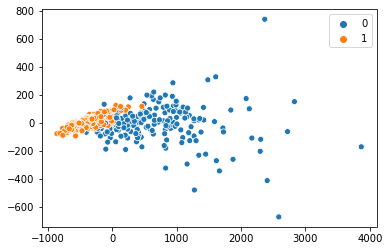

In [10]:
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue = y )

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify=y) 

In [13]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [14]:
lr = LogisticRegression(solver='lbfgs')

In [15]:
lr.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
lr.score(X_test, y_test)

0.956140350877193

In [17]:
lr.score(X_train, y_train)

0.9472527472527472

In [19]:
lr.coef_

array([[ 1.14450415,  0.3983167 ,  0.14828706, -0.00799283, -0.04731965,
        -0.2146106 , -0.30096036, -0.12506409, -0.0807812 , -0.01508306,
         0.04230635,  0.49823205,  0.175635  , -0.11059695, -0.00452812,
        -0.04771546, -0.06843265, -0.01700292, -0.01974782, -0.00407674,
         1.14049289, -0.47570596, -0.1720624 , -0.02102277, -0.08508049,
        -0.68613191, -0.86068505, -0.24591021, -0.24022978, -0.06559311]])

In [21]:
import numpy as np
import pandas as pd
to_keep = np.absolute(lr.coef_) > 0.1

In [22]:
X_train_new = pd.DataFrame(X_train).loc[:, to_keep[0]].values

In [25]:
x_test_new = pd.DataFrame(X_test).loc[:, to_keep[0]].values

In [26]:
X_train_new

array([[1.032e+01, 1.635e+01, 6.531e+01, ..., 4.384e-02, 2.381e-02,
        2.681e-01],
       [2.018e+01, 1.954e+01, 1.338e+02, ..., 5.308e-01, 2.173e-01,
        3.032e-01],
       [1.066e+01, 1.515e+01, 6.749e+01, ..., 0.000e+00, 0.000e+00,
        2.710e-01],
       ...,
       [1.546e+01, 2.395e+01, 1.038e+02, ..., 5.911e-01, 2.163e-01,
        3.013e-01],
       [1.705e+01, 1.908e+01, 1.134e+02, ..., 5.018e-01, 2.543e-01,
        3.109e-01],
       [1.088e+01, 1.562e+01, 7.041e+01, ..., 3.365e-01, 7.966e-02,
        2.581e-01]])

In [27]:
x_test_new

array([[1.955e+01, 2.877e+01, 1.336e+02, ..., 4.251e-01, 1.941e-01,
        2.818e-01],
       [1.113e+01, 1.662e+01, 7.047e+01, ..., 4.580e-02, 4.044e-02,
        2.383e-01],
       [1.382e+01, 2.449e+01, 9.233e+01, ..., 3.381e-01, 1.521e-01,
        3.651e-01],
       ...,
       [1.532e+01, 1.727e+01, 1.032e+02, ..., 4.429e-01, 2.229e-01,
        3.258e-01],
       [1.262e+01, 2.397e+01, 8.135e+01, ..., 3.911e-01, 1.180e-01,
        2.826e-01],
       [1.168e+01, 1.617e+01, 7.549e+01, ..., 1.490e-01, 9.815e-02,
        2.804e-01]])

In [28]:
lr = LogisticRegression(solver='lbfgs')

In [29]:
lr.fit(X_train_new, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr.score(x_test_new, y_test)

0.9649122807017544